In [91]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns


In [92]:
lead = pd.read_csv('Leads.csv')

In [93]:
lead.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


In [94]:
lead.shape

(9240, 37)

In [95]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Cleaning up the data

In [96]:
lead.isnull().sum()/len(lead)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [97]:
for leadcolumns in lead.columns:
    if (lead[leadcolumns].isnull().sum()/len(lead)*100) >30.0:
        lead.drop(leadcolumns, axis=1, inplace=True)

In [98]:
lead.isnull().sum()/len(lead)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [99]:
#Remove unwanted variables
unwanted_variables = ['Prospect ID', 'Lead Number', 'Update me on Supply Chain Content','Country', 'What is your current occupation', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Receive More Updates About Our Courses','Receive More Updates About Our Courses', 'Get updates on DM Content', 'Lead Profile', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']
lead = lead.drop(lead[unwanted_variables], axis=1)

In [100]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 7802 

In [101]:
#Remaining columns have null values but these are all required details to build a model. So place the null values with '0'
lead.fillna('0', inplace=True)
lead.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
How did you hear about X Education               0
What matters most to you in choosing a course    0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
dtype: int64

## Converting Yes No attributes into binary attribute

In [102]:
varlist = ["Do Not Email", "Do Not Call","Newspaper", "Digital Advertisement","Through Recommendations"]
def bin_map(x):
    return x.map({'Yes': 1, 'No':0})


lead[varlist] = lead[varlist].apply(bin_map)

In [103]:
lead

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What matters most to you in choosing a course,Newspaper,Digital Advertisement,Through Recommendations
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Select,Select,Better Career Prospects,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Select,Select,Better Career Prospects,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Better Career Prospects,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Better Career Prospects,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Select,Other,Better Career Prospects,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,0,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Select,Better Career Prospects,0,0,0
9236,Landing Page Submission,Direct Traffic,0,0,0,2.0,238,2.0,SMS Sent,Media and Advertising,Select,Better Career Prospects,0,0,0
9237,Landing Page Submission,Direct Traffic,1,0,0,2.0,199,2.0,SMS Sent,Business Administration,Select,Better Career Prospects,0,0,0
9238,Landing Page Submission,Google,0,0,1,3.0,499,3.0,SMS Sent,Human Resource Management,Online Search,0,0,0,0


In [104]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9240 non-null   object
 1   Lead Source                                    9240 non-null   object
 2   Do Not Email                                   9240 non-null   int64 
 3   Do Not Call                                    9240 non-null   int64 
 4   Converted                                      9240 non-null   int64 
 5   TotalVisits                                    9240 non-null   object
 6   Total Time Spent on Website                    9240 non-null   int64 
 7   Page Views Per Visit                           9240 non-null   object
 8   Last Activity                                  9240 non-null   object
 9   Specialization                                 9240 non-null   

### Univariate Analysis

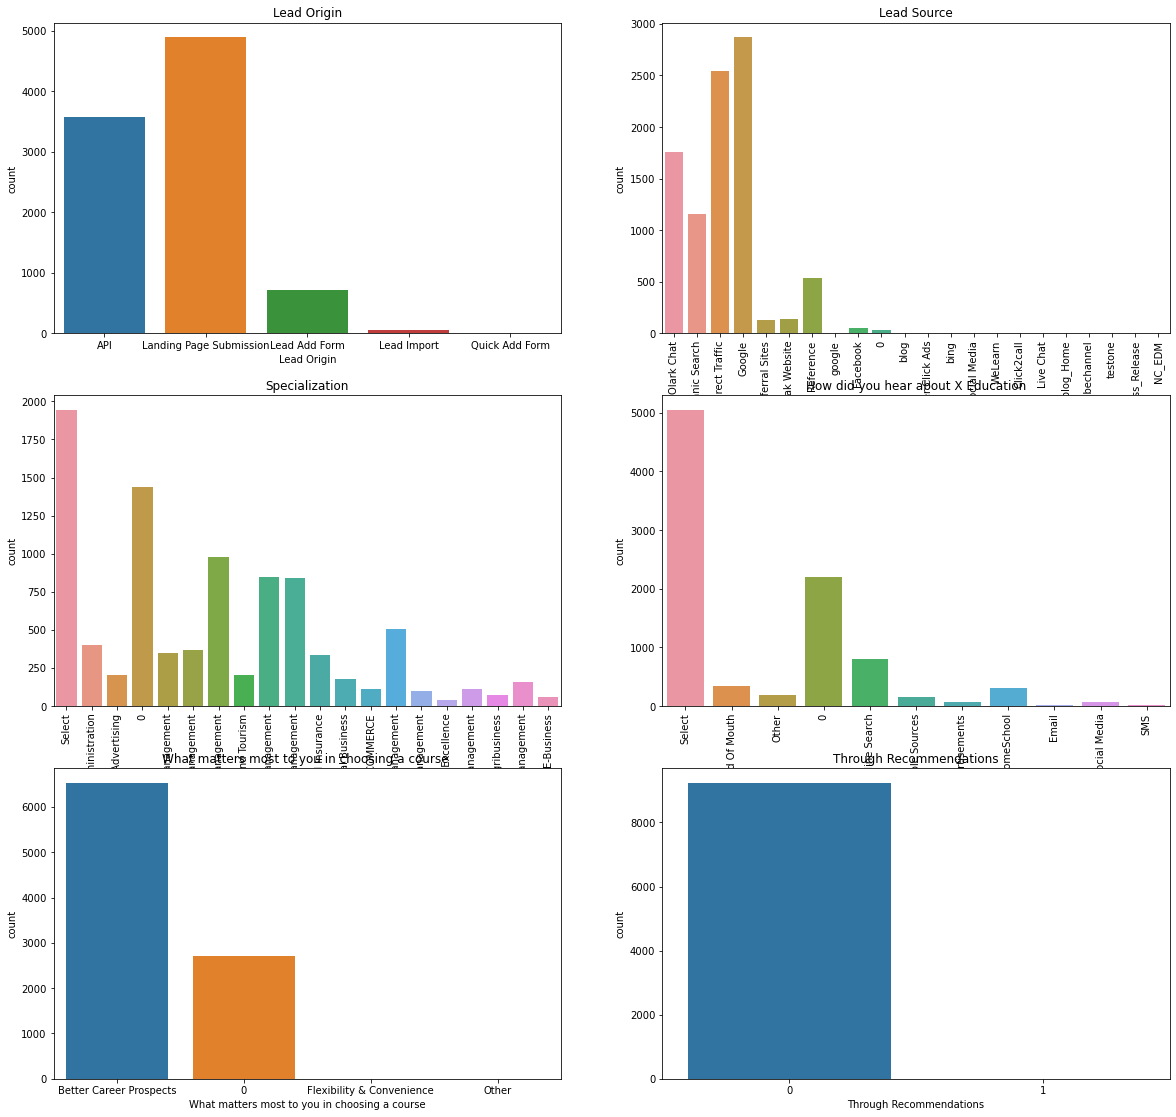

In [106]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(lead['Lead Origin'])
plt.title('Lead Origin')


plt.subplot(6,2,2)
sns.countplot(lead['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')



plt.subplot(6,2,3)
sns.countplot(lead['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')


plt.subplot(6,2,4)
sns.countplot(lead['How did you hear about X Education']).tick_params(axis='x', rotation = 90)
plt.title('How did you hear about X Education')


plt.subplot(6,2,5)
sns.countplot(lead['What matters most to you in choosing a course'])
plt.title('What matters most to you in choosing a course ')


plt.subplot(6,2,6)
sns.countplot(lead['Through Recommendations'])
plt.title('Through Recommendations')

plt.show()

As per the analysis, it is clear that 
    - lead origin is more in Landing page submission
    - lead source is more from Google
    - Better career prospects makes the leads to choose a select sourse
    - Leads are not joined based on News paper advertisement, digital advertisement and through recommendation   

## Categorical Variable relationship Analysis

Text(0.5, 1.0, 'Lead Origin')

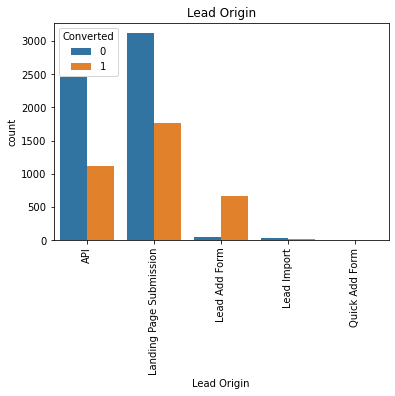

In [16]:
sns.countplot(x='Lead Origin', hue = 'Converted', data = lead).tick_params(axis ='x', rotation = 90)
plt.title('Lead Origin')

Text(0.5, 1.0, 'Lead Source')

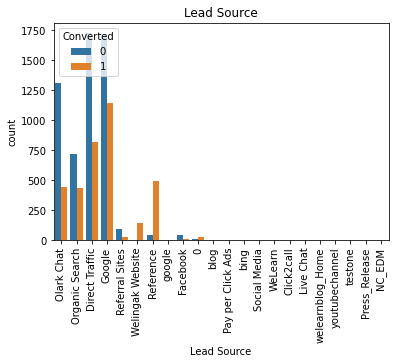

In [17]:
sns.countplot(x='Lead Source', hue = 'Converted', data = lead).tick_params(axis ='x', rotation = 90)
plt.title('Lead Source')

As per the analysis, people landing on the google web page are more probability to become a hot

## Multivariate Analysis

<AxesSubplot:>

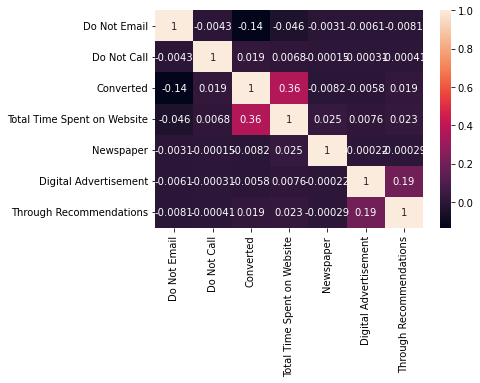

In [18]:
sns.heatmap(lead.corr(), annot=True)

### Create Dummy variables

In [19]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9240 non-null   object
 1   Lead Source                                    9240 non-null   object
 2   Do Not Email                                   9240 non-null   int64 
 3   Do Not Call                                    9240 non-null   int64 
 4   Converted                                      9240 non-null   int64 
 5   TotalVisits                                    9240 non-null   object
 6   Total Time Spent on Website                    9240 non-null   int64 
 7   Page Views Per Visit                           9240 non-null   object
 8   Last Activity                                  9240 non-null   object
 9   Specialization                                 9240 non-null   

In [20]:
lead_dummy_origin = pd.get_dummies(lead['Lead Origin'], prefix= 'Lead Origin', drop_first=True)
lead_dummy_source = pd.get_dummies(lead['Lead Source'], prefix = 'Lead Source', drop_first=True)
lead_dummy_activity = pd.get_dummies(lead['Last Activity'], prefix = 'Last Activity', drop_first=True)
lead_dummy_specialization = pd.get_dummies(lead['Specialization'], prefix = 'Specialization', drop_first=True)
lead_dummy_XEducation = pd.get_dummies(lead['How did you hear about X Education'], prefix = 'X Education', drop_first=True)
lead_dummy_ChoosingCourse = pd.get_dummies(lead['What matters most to you in choosing a course'], prefix = 'X Education', drop_first=True)

In [21]:
lead = pd.concat([lead, lead_dummy_origin, lead_dummy_source, lead_dummy_activity, lead_dummy_specialization, lead_dummy_XEducation, lead_dummy_ChoosingCourse], axis=1)

In [22]:
lead

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,X Education_Online Search,X Education_Other,X Education_SMS,X Education_Select,X Education_Social Media,X Education_Student of SomeSchool,X Education_Word Of Mouth,X Education_Better Career Prospects,X Education_Flexibility & Convenience,X Education_Other
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Select,...,0,0,0,1,0,0,0,1,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Select,...,0,0,0,1,0,0,0,1,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,1,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,...,0,0,0,0,0,0,1,1,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Select,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,0,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,...,0,0,0,1,0,0,0,1,0,0
9236,Landing Page Submission,Direct Traffic,0,0,0,2.0,238,2.0,SMS Sent,Media and Advertising,...,0,0,0,1,0,0,0,1,0,0
9237,Landing Page Submission,Direct Traffic,1,0,0,2.0,199,2.0,SMS Sent,Business Administration,...,0,0,0,1,0,0,0,1,0,0
9238,Landing Page Submission,Google,0,0,1,3.0,499,3.0,SMS Sent,Human Resource Management,...,1,0,0,0,0,0,0,0,0,0


In [23]:
lead.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'How did you hear about X Education', 'What matters most to you in choosing a course'], axis=1, inplace=True)

In [24]:
lead

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,...,X Education_Online Search,X Education_Other,X Education_SMS,X Education_Select,X Education_Social Media,X Education_Student of SomeSchool,X Education_Word Of Mouth,X Education_Better Career Prospects,X Education_Flexibility & Convenience,X Education_Other
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3,0,0,0,1.0,305,1.0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,1,8.0,1845,2.67,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9236,0,0,0,2.0,238,2.0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9237,1,0,0,2.0,199,2.0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9238,0,0,1,3.0,499,3.0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


## Train test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#Create X dataset
X = lead.drop('Converted', axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,X Education_Online Search,X Education_Other,X Education_SMS,X Education_Select,X Education_Social Media,X Education_Student of SomeSchool,X Education_Word Of Mouth,X Education_Better Career Prospects,X Education_Flexibility & Convenience,X Education_Other
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,2.0,1532,2.0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1.0,305,1.0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,0,0,2.0,1428,1.0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [27]:
#Create a target variable
y = lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=20)

In [29]:
#import library for scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]= scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,X Education_Online Search,X Education_Other,X Education_SMS,X Education_Select,X Education_Social Media,X Education_Student of SomeSchool,X Education_Word Of Mouth,X Education_Better Career Prospects,X Education_Flexibility & Convenience,X Education_Other
4773,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
8710,0,0,0.011952,0.043574,0.054545,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2620,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,0,0,0.015936,0.098151,0.036364,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2489,0,0,0.007968,0.639525,0.018182,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


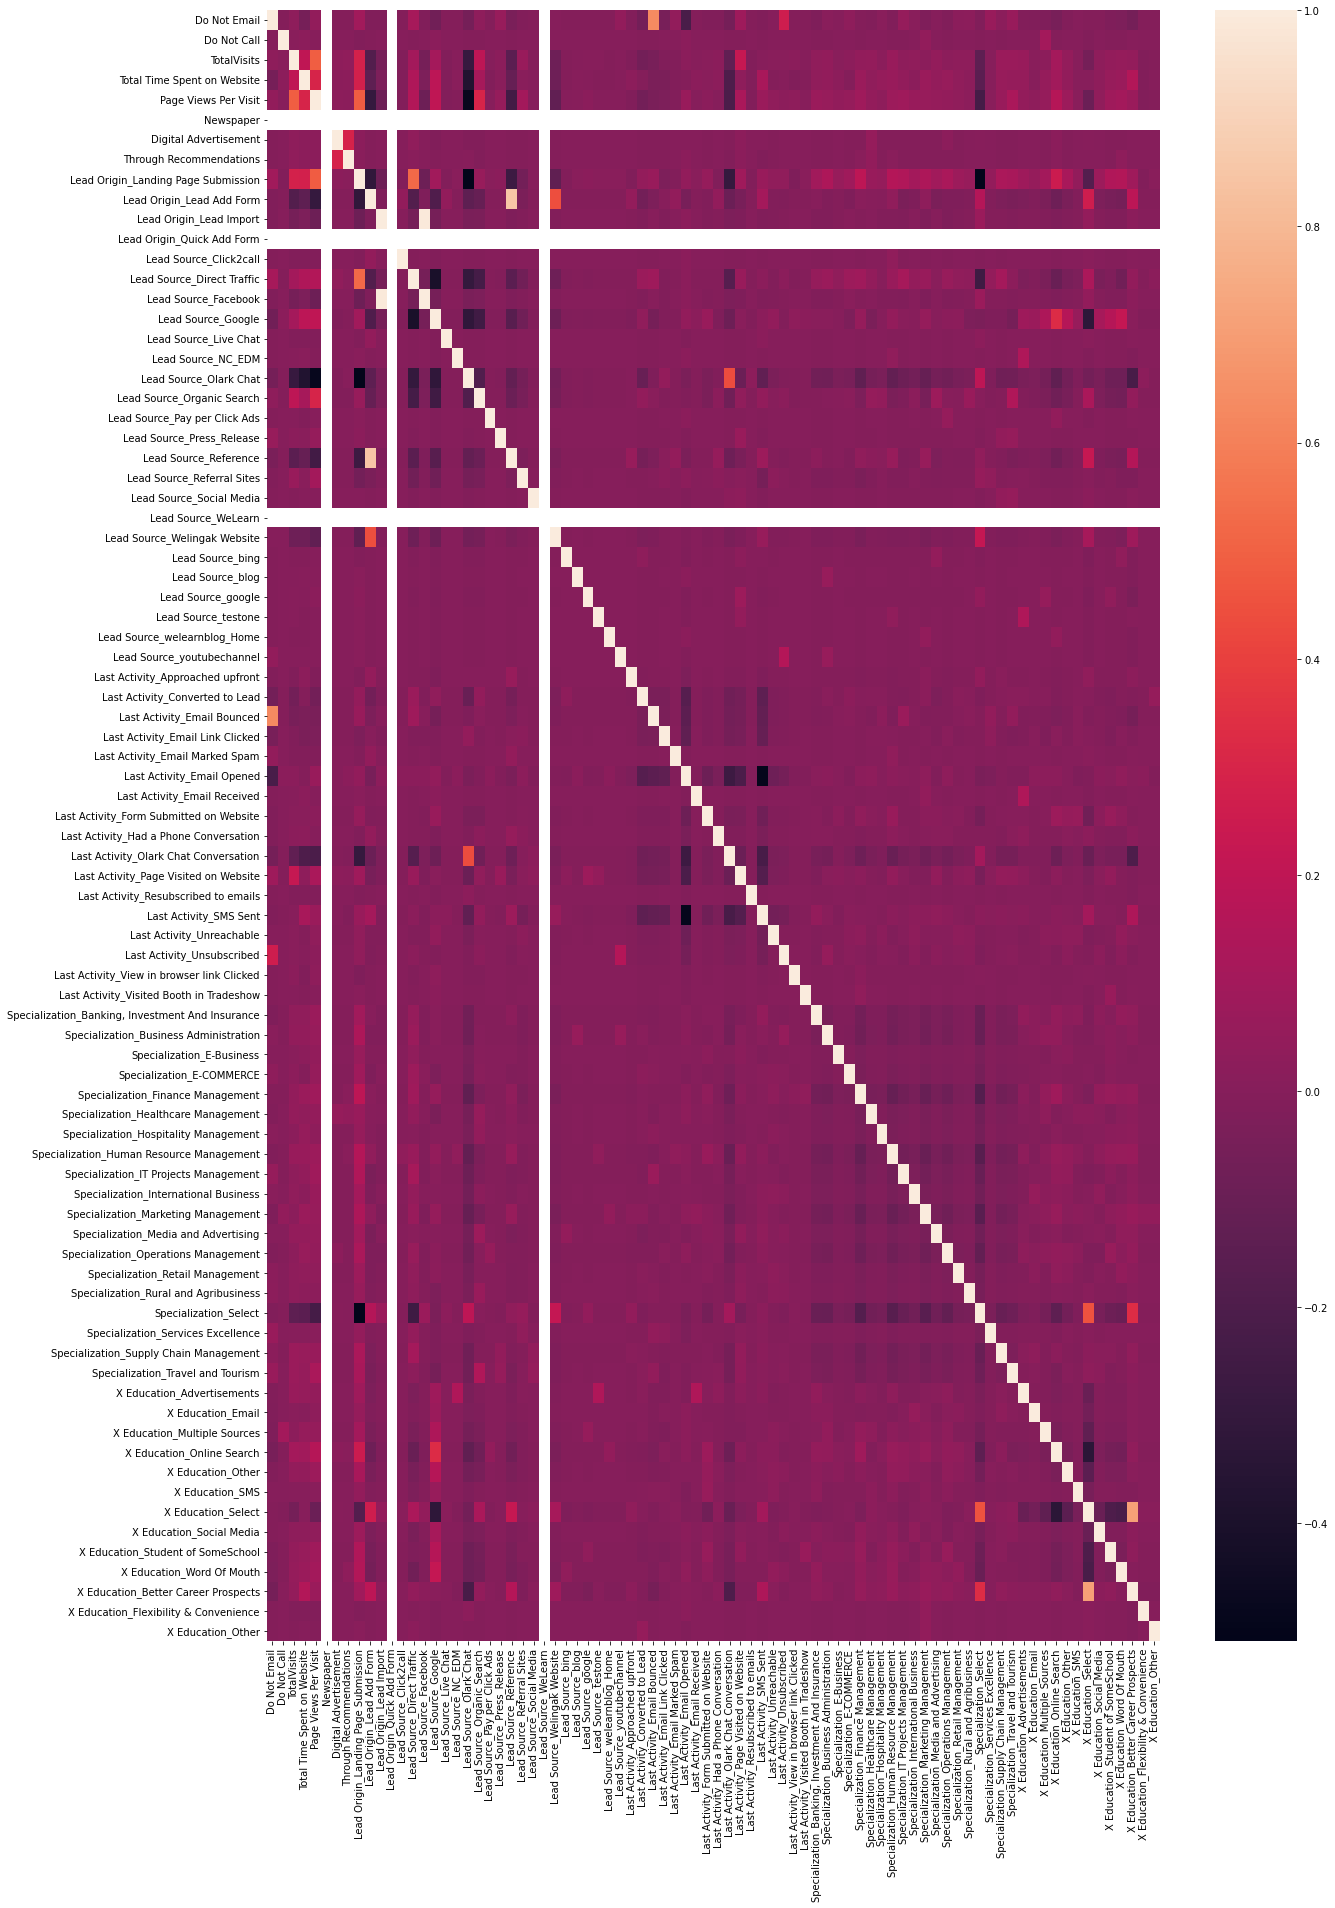

In [30]:
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

## Model Building

In [31]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
#import RFE
from sklearn.feature_selection import RFE
#Import library required to build a model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [32]:
# Running RFE with 15 variables as output
rfe = RFE(logreg)
rfe = rfe.fit(X_train, y_train)

In [33]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 22),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Newspaper', False, 41),
 ('Digital Advertisement', False, 26),
 ('Through Recommendations', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 42),
 ('Lead Source_Click2call', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 11),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 28),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 10),
 ('Lead Source_Press_Release', False, 19),
 ('Lead Source_Reference', False, 5),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 20),
 ('Lead Source_WeLearn', False, 40),
 ('

In [34]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [35]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [36]:
#Import library required to build a model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


In [37]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial(), missing='drop')
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6426
Model Family:                Binomial   Df Model:                           41
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2687.1
Date:                Tue, 21 Mar 2023   Deviance:                       5374.3
Time:                        21:23:44   Pearson chi2:                 6.27e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.6653      0.678     -3.929      0.000      -3.995      -1.336
Do Not Email                                        -1.3442      0.182     -7.371      0.000      -1.702      -0.987
TotalVisits                                         10.4473      2.500      4.178      0.000       5.547      15.348
Total Time Spent on Website                          4.5920      0.168     27.391      0.000       4.263       4.921
Page Views Per Visit                                -4.2196      1.317     -3.203      0.001      -6.801      -1.638
Through Recommendations                              1.5902      1.329      1.196      0.232      -1.015       4.196
Lead Origin_Landing Page Submission                 -0.7468      0.120     -6.228      0.000      -0.982      -0.512
Lead Origin_Lead Add Form                            2.0098      0.692      2.902      0.004       0.653       3.367
Lead Origin_Lead Import                             -1.0392      0.776     -1.339      0.181      -2.560       0.482
Lead Source_Click2call                             -24.6373   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Source_Direct Traffic                          -1.2231      0.669     -1.829      0.067      -2.534       0.087
Lead Source_Google                                  -0.8488      0.668     -1.271      0.204      -2.158       0.461
Lead Source_NC_EDM                                  22.9074   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                               0.1661      0.675      0.246      0.806      -1.156       1.489
Lead Source_Organic Search                          -0.9150      0.673     -1.360      0.174      -2.233       0.403
Lead Source_Referral Sites                          -0.8337      0.731     -1.141      0.254      -2.266       0.599
Lead Source_Welingak Website                         2.4641      0.742      3.321      0.001       1.010       3.918
Last Activity_Approached upfront                    22.4556   1.34e+04      0.002      0.999   -2.63e+04    2.63e+04
Last Activity_Converted to Lead                     -0.4358      0.218     -1.995      0.046      -0.864      -0.008
Last Activity_Email Opened                           0.6821      0.112      6.069      0.000       0.462       0.902
Last Activity_Had a Phone Conversation               0.8590      0.647      1.327      0.185      -0.410       2.128
Last Activity_Olark Chat Conversation               -0.8252      0.189     -4.355      0.000      -1.197      -0.454
Last Activity_Resubscribed to emails                25.0652   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                   

### Creating Prediction

In [39]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4773    0.963986
8710    0.015189
2620    0.139787
32      0.118341
2489    0.971324
5568    0.186602
8111    0.350086
2224    0.596215
7298    0.067066
436     0.087179
dtype: float64

In [40]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.96398599, 0.0151893 , 0.13978691, 0.11834129, 0.97132447,
       0.18660178, 0.35008564, 0.59621461, 0.06706616, 0.08717925])

In [41]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.963986
1,0,0.015189
2,0,0.139787
3,0,0.118341
4,1,0.971324


In [42]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.963986,1
1,0,0.015189,0
2,0,0.139787,0
3,0,0.118341,0
4,1,0.971324,1


## Model Evaluation

In [43]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [44]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3476,  510],
       [ 727, 1755]], dtype=int64)

In [45]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)


0.8087507730364873

Accuracy is around 81%. Its a good one

In [46]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [47]:
# Calculating the sensitivity
TP/(TP+FN)

0.7070910556003224

In [48]:
# Calculating the specificity
TN/(TN+FP)

0.8720521826392373

    Current cut off is 0.5, we have around 81% of accuracy, sensitivity = 0.70% and Specificity = 0.87%

## Optimise Cut off (ROC Curve)

In [49]:
    # ROC function
    def draw_roc( actual, probs):
        fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                                  drop_intermediate = False)
        auc_score = metrics.roc_auc_score( actual, probs )
        plt.figure(figsize=(5, 5))
        plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()
        return None

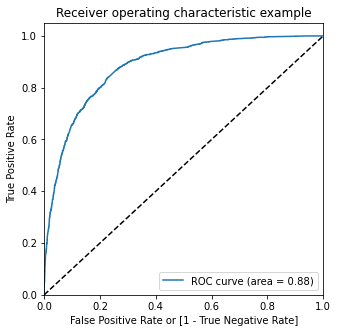

In [50]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

`The area underROC curve is 0.88

In [51]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.963986,1,1,1,1,1,1,1,1,1,1,1
1,0,0.015189,0,1,0,0,0,0,0,0,0,0,0
2,0,0.139787,0,1,1,0,0,0,0,0,0,0,0
3,0,0.118341,0,1,1,0,0,0,0,0,0,0,0
4,1,0.971324,1,1,1,1,1,1,1,1,1,1,1


In [52]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.383735,1.000000,0.000000
0.1,0.1,0.633426,0.976632,0.419719
0.2,0.2,0.748145,0.925866,0.637481
0.3,0.3,0.788497,0.873489,0.735575
0.4,0.4,0.803185,0.772361,0.822378
0.5,0.5,0.808751,0.707091,0.872052
0.6,0.6,0.797774,0.604351,0.918214
0.7,0.7,0.777211,0.510475,0.943302
0.8,0.8,0.747526,0.399275,0.964375
0.9,0.9,0.696351,0.227236,0.988460


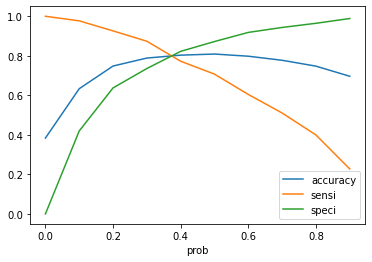

In [53]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

    From the graph, it is clear that cutoff is aroung 0.35

In [54]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.963986,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.015189,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.139787,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.118341,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.971324,1,1,1,1,1,1,1,1,1,1,1,1


In [55]:
# Overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7990105132962276

In [56]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3172,  814],
       [ 486, 1996]], dtype=int64)

In [57]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [58]:
# Calculating the sensitivity
TP/(TP+FN)

0.8041901692183723

In [59]:
# Calculating the specificity
TN/(TN+FP)

0.7957852483692925

With the cutoff = 0.35 accuracy is 0.799, sensitivity = 0.80 and specificity = 0.795

## Prediction on Test Set

In [60]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [61]:
# Substituting all the columns in the final train model
col = X_train.columns

In [62]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,...,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Supply Chain Management,X Education_Email,X Education_Multiple Sources,X Education_Better Career Prospects,X Education_Flexibility & Convenience
1512,1.0,0,0.015936,18.090909,0.000585,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9057,1.0,0,0.015936,1.654545,0.001761,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9073,1.0,0,0.007968,3.145455,0.000880,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6740,1.0,0,0.019920,26.345455,0.002201,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6041,1.0,0,0.007968,3.690909,0.000880,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2326,1.0,0,0.015936,34.218182,0.000880,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7747,1.0,0,0.003984,5.672727,0.000440,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7974,1.0,1,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4159,1.0,0,0.015936,2.945455,0.001761,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [63]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,1.000000
1,0,0.997885
2,0,0.999999
3,1,1.000000
4,0,1.000000


In [64]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,1.000000,1
1,0,0.997885,1
2,0,0.999999,1
3,1,1.000000,1
4,0,1.000000,1
...,...,...,...
2767,1,1.000000,1
2768,0,1.000000,1
2769,0,0.009299,0
2770,0,0.999965,1


In [65]:
    # Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.5072150072150072

In [66]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.5072150072150072

In [67]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[ 387, 1306],
       [  60, 1019]], dtype=int64)

In [68]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [69]:
# Calculating the sensitivity
TP/(TP+FN)

0.9443929564411492

In [70]:
# Calculating the specificity
TN/(TN+FP)

0.22858830478440637

## Precision Recall

In [71]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3476,  510],
       [ 727, 1755]], dtype=int64)

In [72]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7748344370860927

In [73]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7070910556003224

With the current cut off = 0.35 precision = 0.77 and recall is around 0.70

## Precision and recall tradeoff

In [74]:
from sklearn.metrics import precision_recall_curve

In [75]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       1
        ..
 6463    0
 6464    0
 6465    0
 6466    1
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       1
        ..
 6463    0
 6464    0
 6465    0
 6466    1
 6467    0
 Name: Predicted, Length: 6468, dtype: int64)

In [76]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

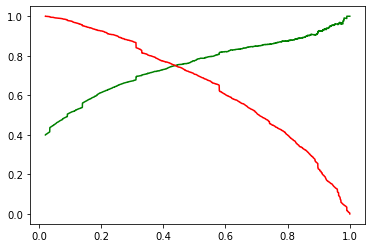

In [77]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [78]:
    y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.963986,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.015189,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.139787,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.118341,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.971324,1,1,1,1,1,1,1,1,1,1,1,1


In [79]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8045763760049475

In [80]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3298,  688],
       [ 576, 1906]], dtype=int64)

In [81]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [82]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7347725520431766

In [83]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7679290894439967

With the current cut off 0.41 we have precision around 0.73 and recall around 0.76

## Prediction on Test Set

In [84]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,1.000000
1,0,0.997885
2,0,0.999999
3,1,1.000000
4,0,1.000000


In [85]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,1.000000,1
1,0,0.997885,1
2,0,0.999999,1
3,1,1.000000,1
4,0,1.000000,1
...,...,...,...
2767,1,1.000000,1
2768,0,1.000000,1
2769,0,0.009299,0
2770,0,0.999965,1


In [86]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.5097402597402597

In [87]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[ 395, 1298],
       [  61, 1018]], dtype=int64)

In [88]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [89]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.43955094991364424

In [90]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.943466172381835